In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

wine = pd.read_csv('winequality-red.csv')

wine.head()
wine.info()
#결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: ylabel='Count'>

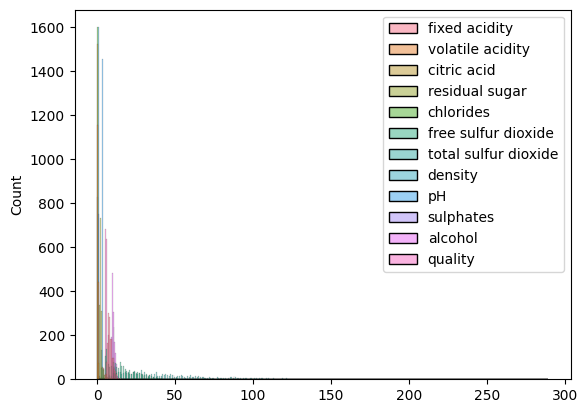

In [106]:
sns.histplot(wine)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
dtype: float64


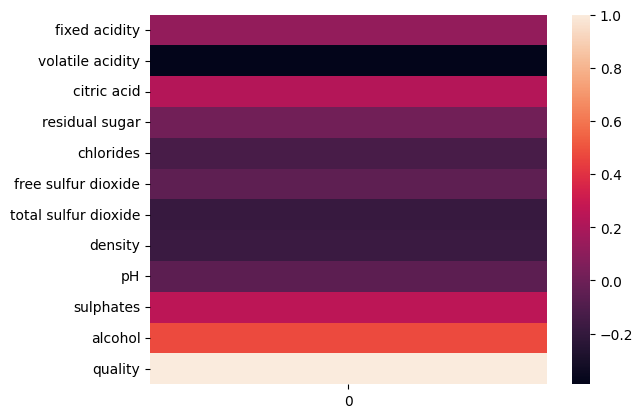

In [107]:
wine.corrwith(wine['quality'])
wc = wine.corrwith(wine['quality'])
print(wc)
#corrwith는 특정 변수와 다른 변수간의 상관계수 출력
#품질점수와 가장 밀접한 상관관계를 갖는 변수는 fixed acidity

#quality와 상관관계 시각화
#to_frame은 series를 DataFrame으로 변환
#히트맵은 2차원 배열을 필요로함
sns.heatmap(wc.to_frame())
plt.show()

In [108]:
#학습 데이터와 검증 데이터 분할
X=wine.drop(['quality'], axis=1)
y=wine['quality']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [112]:
#랜덤 포레스트 모델 RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#모델 생성
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

#모델 훈련
rfr_model.fit(X_train, y_train)

#예측
y_pred_rfr = rfr_model.predict(X_test)

#성능평가 RMSE, MAE, R2점수 계산
print(mean_squared_error(y_test, y_pred_rfr))
print(mean_absolute_error(y_test, y_pred_rfr))
print(r2_score(y_test, y_pred_rfr))



0.30123812499999997
0.4224375
0.5390429623873638


In [113]:
#LinearRegression 선형회귀모델
from sklearn.linear_model import LinearRegression

#선형회귀모델 생성
lr_model = LinearRegression()

#선형회귀모델 학습
lr_model.fit(X_train, y_train)

#예측
y_pred = lr_model.predict(X_test)

#성능평가
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


0.39002514396395427
0.5035304415524375
0.4031803412796229


In [ ]:
#품질점수 > 6 : Good, < 6 : Not Good 인 quality_label이라는 항목을 추가
wine['quality_label']=wine['quality'].apply(lambda x : 'Good' if x>=6 else 'Not Good')

#훈련 데이터와 테스트 데이터 분할
w=wine.drop(['quality', 'quality_label'], axis=1)
z=wine['quality_label']

w_train, w_test, z_train, z_test = train_test_split(w,z, test_size=0.2, random_state=42)

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier 모델 생성
rfc_model = RandomForestClassifier()

#학습
rfc_model.fit(w_train, z_train)

#예측
z_pred_rfc = rfc_model.predict(w_test)

#분류 모델 성능평가
from sklearn.metrics import classification_report

print(classification_report(z_test, z_pred_rfc))





              precision    recall  f1-score   support

        Good       0.81      0.82      0.81       179
    Not Good       0.76      0.75      0.76       141

    accuracy                           0.79       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.79      0.79      0.79       320

